<a href="https://colab.research.google.com/github/venkataratnamb20/quicksilicon/blob/notebooks/notebooks/cpp_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C/CPP in Python


## Setup

### ngspice

References

- [sourceforge](https://ngspice.sourceforge.io/download.html)
- [sourceforge: all manuals](https://ngspice.sourceforge.io/docs.html)
- [sourceforge-manual-pdf](https://ngspice.sourceforge.io/docs/ngspice-manual.pdf)
- [sourceforge: Develepers page](https://ngspice.sourceforge.io/devel.html)
- [Manual: Page 24- C language guide](https://ngspice.sourceforge.io/docs/ngspice-manual.pdf)

Downloads

- [sourceforge](https://sourceforge.net/projects/ngspice/)
- [sourceforge-repo](git://git.code.sf.net/p/ngspice/ngspice)

```bash
git clone git://git.code.sf.net/p/ngspice/ngspice
```
- [github-repo](https://github.com/danchitnis/ngspice-sf-mirror/tree/pre-master-44)
- [gitlab-repo](https://gitlab.com/ngspice/ngspice/-/tree/pre-master-44)
- [gitlab-ngspice-repo](https://github.com/ngspice/ngspice/blob/master/INSTALL)
- [github/KiKad-Spice-Library](https://github.com/kicad-spice-library/KiCad-Spice-Library)


Conferences

- [sourceforge](https://ngspice.sourceforge.io/)
- [FOSDEM official](https://fosdem.org/2024/)
- [FOSDEM2024-KiKad](https://fosdem.org/2024/schedule/event/fosdem-2024-2834-ngspice-circuit-simulator-stand-alone-and-embedded-into-kicad/)



In [ ]:
# install ngspice if not installed
!ngspice --version || apt install ngspice

/bin/bash: line 1: ngspice: command not found
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  ngspice-doc
The following NEW packages will be installed:
  ngspice
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,352 kB of archives.
After this operation, 7,972 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 ngspice amd64 36+ds-1ubuntu0.1 [2,352 kB]
Fetched 2,352 kB in 1s (2,751 kB/s)
Selecting previously unselected package ngspice.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../ngspice_36+ds-1ubuntu0.1_amd64.deb ...
Unpacking ngspice (36+ds-1ubuntu0.1) ...
Setting up ngspice (36+ds-1ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...


### NgSpice: Examples

Spiceinit file

In [ ]:
%%writefile .spiceinit

* .spiceinit for use with Skywater PDK and ngspice KLU
set ngbehavior=hsa ; set compatibility for reading ; PDK libs
set skywaterpdk
set ng_nomodcheck
option noinit
option klu ; omit some time consuming checks
                        ; during lib loading
                        ; don’t check the model parameters
                        ; don’t print operating point data
                        ; select KLU as matrix solver
optran 0 0 0 100p 2n 0 ; don’t use dc operating point,
                        ; but transient op

Writing .spiceinit


#### Circuit

In [ ]:
%%writefile rc_tb.cir

* RC LPF
*** Schemtic
.TITLE RC LPF
.PARAM tclk = 200p
R1 vin vout 160M
R2 vout 0 160M
C2 vout 0 100p
V1 vin 0 DC 0 PULSE (0V 1.8V {tclk/2 - 10p} 10ps 10ps {tclk/2 - 10p} {tclk})

*** Control
.CONTROL
tran 10p 800p
option noinit
set wr_singlescale
set wr_vecnames
rusage time
save all
save @r1[i] @r2[i]
save @c2[i]
run
wrdata rc_tb.csv V(vin) V(vout) @r1[i] @r2[i] @c2[i]
.ENDC
.END


Writing rc_tb.cir


#### Run Simulation

In [ ]:

# run sim

!ngspice -b rc_tb.cir


during: no such command available in ngspice
don’t: no such command available in ngspice
don’t: no such command available in ngspice
select: no such command available in ngspice
but: no such command available in ngspice

Compatibility modes selected: hs a


Circuit: RC LPF

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Note: Transient op started
Note: Transient op finished successfully

No. of Data Rows : 172
Total analysis time (seconds) = 0
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Note: No ".plot", ".print", or ".fourier" lines; no simulations run


#### Read the data


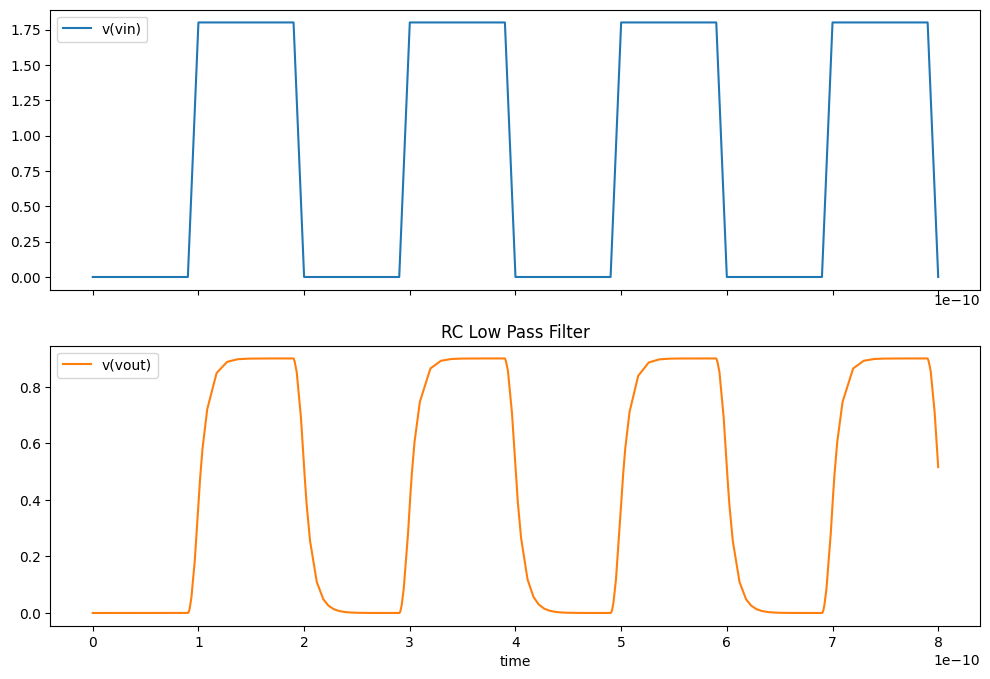

,v(vin),v(vout),@r1[i],@r2[i],@c2[i]
time,,,,,
0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0
8.000000e-14,0.000000e+00,0.000000,0.0,0.0,0.0
1.600000e-13,0.000000e+00,0.000000,0.0,0.0,0.0
3.200000e-13,0.000000e+00,0.000000,0.0,0.0,0.0
6.400000e-13,0.000000e+00,0.000000,0.0,0.0,0.0
...,...,...,...,...,...
7.900000e-10,1.800000e+00,0.899999,0.0,0.0,0.0
7.909528e-10,1.628497e+00,0.890873,0.0,0.0,0.0
7.928584e-10,1.285492e+00,0.856312,0.0,0.0,0.0


In [ ]:
# read data with python
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("rc_tb.csv", delim_whitespace = True, skip_blank_lines=True ).set_index('time')
data_df_final = data[["v(vin)", "v(vout)"]]
data_df_final.plot(subplots=True, figsize=(12, 8))
plt.title('RC Low Pass Filter')
plt.show()
data_df_final

data

#### NgSpice Interactive mode

In [ ]:
%%shell

ngspice --version

******
** ngspice-36 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 11 21:44:53 UTC 2024
******


In [ ]:
# %%shell

!ngspice -i

during: no such command available in ngspice
don’t: no such command available in ngspice
don’t: no such command available in ngspice
select: no such command available in ngspice
but: no such command available in ngspice
******
** ngspice-36 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 11 21:44:53 UTC 2024
******
ERROR: (external)  no graphics interface;
 please check if X-server is running,
 or ngspice is compiled properly (see INSTALL)
ngspice 1 -> source rc-tb.cir
Command 'source' failed:
rc-tb.cir: No such file or directory
    Simulation interrupted due to error!

ngspice 1 -> source rc_tb.cir

Compatibility modes selected: hs a


Circuit: RC LPF

Doing analysis at TEMP = 27

### Python C-packages


Python packages

- SWIG (Not recommended)
- Ctypes (Builtin Python)
- CFFI (pypy)
- Boost.Python (Complex)
- PyBind11 (CPP11 and later)

Coding environment


[Youtube/NDC Conference: Integrate Python and C++ with pybind11 - Robert Smallshire](https://youtu.be/YReJ3pSnNDo?si=PjE6QuJaihRoyLyS)

- Python code
  - ctypes
  - cffi (pypy)
- Coding C/C++
  - Python C API (Cython)
  - pybind11
  - Boost.Python
- Others
  - SWIG
  - IDL

## Python C Extensions
Ref: [Youtube/Tobias Bergkvist: Python C Extensions](https://youtu.be/nHEF1epuuco?si=_cfYJYd3_rHmi-Tp)

python system module

```python
import sysconfig

# print python includes path which has c- Python.h
# pass this path while building with gcc with command as follows
# $ gcc <file>.c -shared -o <file>.so -I <includes path>
sys_paths = sysconfig.get_paths()
py_include_path = sys_paths['include']
print(f"includes path: {py_include_path}")

sys_paths
```

Print python package locations

In [ ]:
import sysconfig

# print python includes path which has c- Python.h
# pass this path while building with gcc with command as follows
# $ gcc <file>.c -shared -o <file>.so -I <includes path>
sys_paths = sysconfig.get_paths()
py_include_path = sys_paths['include']
print(f"includes path: {py_include_path}")

sys_paths

includes path: /usr/include/python3.10


{'stdlib': '/usr/lib/python3.10',
 'platstdlib': '/usr/lib/python3.10',
 'purelib': '/usr/local/lib/python3.10/dist-packages',
 'platlib': '/usr/local/lib/python3.10/dist-packages',
 'include': '/usr/include/python3.10',
 'platinclude': '/usr/include/python3.10',
 'scripts': '/usr/local/bin',
 'data': '/usr/local'}

### Example: import 'hello' module in python

### Create directory for package

In [ ]:
import os
package_path = '/content/workspace/packages/cpy_package'
if not os.path.exists(package_path):
  os.makedirs(package_path)


### Write `hello.c`

In [ ]:
%%writefile /content/workspace/packages/cpy_package/hello.c

#define PY_SSIZE_T_CLEAN
#include <Python.h>
#include <stdio.h>

PyObject *add(PyObject *self, PyObject *args){
  int x;
  int y;
  PyArg_ParseTuple(args, "ii", &x, &y);
  return PyLong_FromLong((long)(x + y));
};


PyObject *sub(PyObject *self, PyObject *args){
  double x;
  double y;
  PyArg_ParseTuple(args, "dd", &x, &y);
  return PyFloat_FromDouble(x - y);
};

static PyMethodDef methods[] = {
  { "add", add, METH_VARARGS, "Adds two long numbers and returns long" },
  { "sub", sub, METH_VARARGS, "Substracts two double numbers and returns double" },
  { NULL, NULL, 0, NULL }
};

static struct PyModuleDef hello = {
  PyModuleDef_HEAD_INIT,
  "__name__",
  "__doc__",
  -1,
  methods
};

PyMODINIT_FUNC
PyInit_hello(void)
{
  PyObject *m;

  m = PyModule_Create(&hello);
  printf("Hello World\n");
  return m;
}


Overwriting /content/workspace/packages/cpy_package/hello.c


### Compile C code and make `hello.c` `GLOBAL`


In [ ]:
!cd $package_path && \
  rm -rf hello.so && \
  gcc hello.c -shared -o hello.so -I$py_include_path && \
  ls -al


total 28
drwxr-xr-x 2 root root  4096 Jul 29 15:15 .
drwxr-xr-x 3 root root  4096 Jul 29 15:15 ..
-rw-r--r-- 1 root root   821 Jul 29 15:15 hello.c
-rwxr-xr-x 1 root root 16200 Jul 29 15:15 hello.so


Make `hello` module `GLOBAL`.

In [ ]:
# check whether function is defined as GLOBAL in .so file.
# PyInit_hello should be global

!cd $package_path && \
    readelf hello.so -s | grep GLOBAL

     2: 0000000000000000     0 FUNC    GLOBAL DEFAULT  UND puts@GLIBC_2.2.5 (2)
     3: 0000000000000000     0 FUNC    GLOBAL DEFAULT  UND __[...]@GLIBC_2.4 (3)
     4: 0000000000000000     0 NOTYPE  GLOBAL DEFAULT  UND PyFloat_FromDouble
     5: 0000000000000000     0 NOTYPE  GLOBAL DEFAULT  UND PyLong_FromLong
     7: 0000000000000000     0 NOTYPE  GLOBAL DEFAULT  UND PyModule_Create2
     8: 0000000000000000     0 NOTYPE  GLOBAL DEFAULT  UND _PyArg_ParseTupl[...]
    11: 00000000000011b9   107 FUNC    GLOBAL DEFAULT   14 add
    12: 000000000000129a    57 FUNC    GLOBAL DEFAULT   14 PyInit_hello
    13: 0000000000001224   118 FUNC    GLOBAL DEFAULT   14 sub
    20: 0000000000004000     0 OBJECT  LOCAL  DEFAULT   23 _GLOBAL_OFFSET_TABLE_
    23: 00000000000011b9   107 FUNC    GLOBAL DEFAULT   14 add
    24: 0000000000000000     0 FUNC    GLOBAL DEFAULT  UND puts@GLIBC_2.2.5
    25: 0000000000000000     0 FUNC    GLOBAL DEFAULT  UND __stack_chk_fail[...]
    26: 0000000000000000     0

### Python Example1: import hello into varible


#### Write python Code into variable

In [ ]:

"""
importing hello.so directly gives error that the export function is not defined.
Hence the python code is running with python command throught subprocess.run
"""

import subprocess
# os.chdir(package_path)
# print(os.getcwd())
# print(os.listdir('.'))

# import workspace.packages.cpy_package.hello
# !python -c "import hello; print(hello.add(5, 6))"
python_cpy_test_code = "from workspace.packages.cpy_package import hello;"
python_cpy_test_code += "hello_add = hello.add(5, 6);"
python_cpy_test_code += "hello_add = hello.add(5, 6);"
python_cpy_test_code += "print(f'5 + 6 = {hello_add}');"
python_cpy_test_code += "hello_sub = hello.sub(7.5, 6);"
python_cpy_test_code += "print(f'7.5 - 6 = {hello_sub}')"


Run Python Code

In [ ]:

# python_cpy_test_code = str(python_cpy_test_code)
# !echo ${python_cpy_test_code}
# cmd = ["python", "-c", "from workspace.packages.cpy_package import hello;"]
cmd = ["python", "-c", python_cpy_test_code]
result = subprocess.run(cmd,
               capture_output=True,
               shell = False,
               timeout = 40,
               check = True)
print(result.stdout.decode())
if result.stderr:
  print(result.stderr.decode())
# os.chdir('/content')

5 + 6 = 11
7.5 - 6 = 1.5
Hello World



### Python Example1: import hello in colab


Using `hello` method in Colab

In [ ]:
from workspace.packages.cpy_package import hello, run

print(f"5 - 3: {hello.sub(5, 3)}")
print(f"5 + 3: {hello.add(5, 3)}")
hello.add(2,3)

# bash command
!ngspice -b rc.cir

#
run('rc.cir')

5 - 3: 2.0
5 + 3: 8


5

### Python Example1: import hello into a python file


In [ ]:
%%writefile /content/workspace/hello_python.py

# add packages path (workspace) and import the module in the path
import sys
# sys.path.append('/content/workspace/packages/cpy_package')
sys.path.append('/content/workspace')

from packages.cpy_package import hello

if __name__ == '__main__':
  print(f"5 - 3: {hello.sub(5, 3)}")
  print(f"5 + 3: {hello.add(5, 3)}")


Writing /content/workspace/hello_python.py


In [ ]:
!python /content/workspace/hello_python.py

Hello World
5 - 3: 2.0
5 + 3: 8


## PyBind11

### References

PyBind11

- [Youtube/Facile Tutorials: Using C++ in python with pybind11 and cmake](https://youtu.be/H2wOlriHGmM?si=UWfPZdK0TgPmKhl1)
- [Youtube/NDC Conference: Integrate Python and C++ with pybind11 - Robert Smallshire](https://youtu.be/YReJ3pSnNDo?si=PjE6QuJaihRoyLyS)
-